<a href="https://colab.research.google.com/github/DataAnalystPL/Data_analysis/blob/main/Marketing_campaign_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Campaign - data analysis
data source: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
url = "https://raw.githubusercontent.com/brandynewanek/brandynewanek/main/marketing_campaign.csv"
df = pd.read_csv(url)

In [7]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,172,88,88,3,8,10,4,7,0,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,2,1,6,2,1,1,2,5,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,111,21,42,1,8,2,10,4,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,10,3,5,2,2,0,4,6,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,46,27,15,5,5,3,6,5,0,0


In [10]:
df.shape

(2240, 20)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

# EDA

In [12]:
import matplotlib
matplotlib.style.use('ggplot')

## palette

In [13]:
palette = ['#367C6E', '#EECD69', '#F3AC59', '#954C41', '#E56F3E']

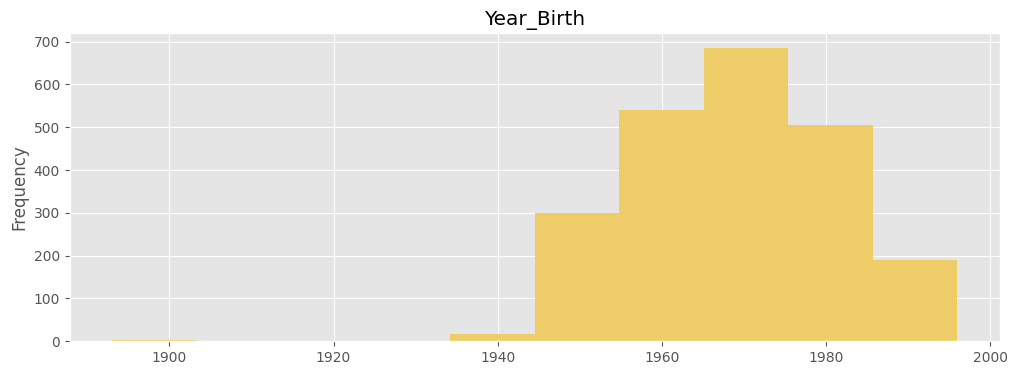

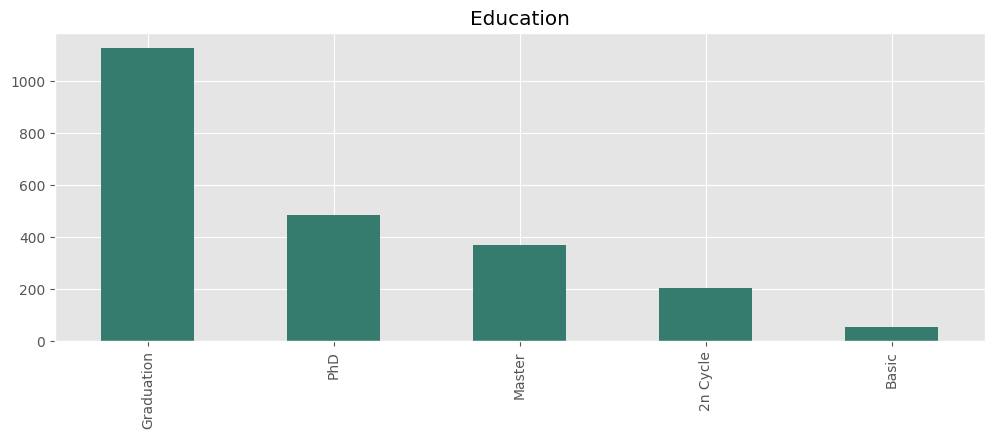

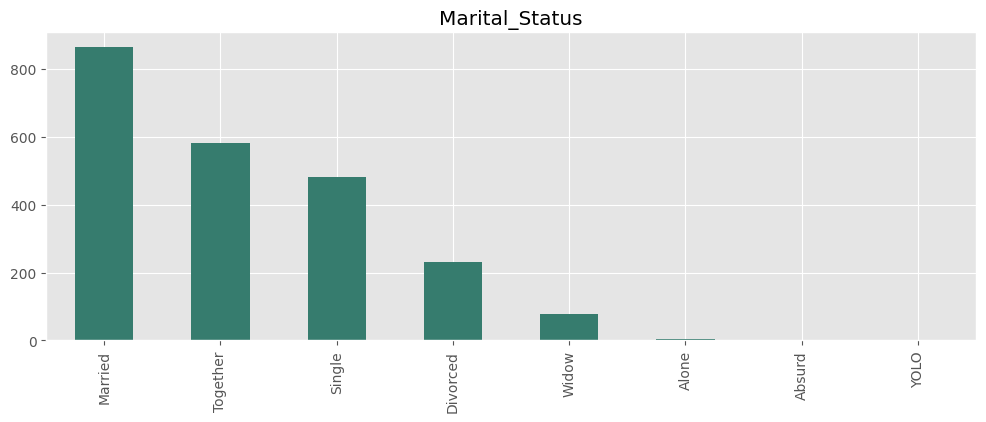

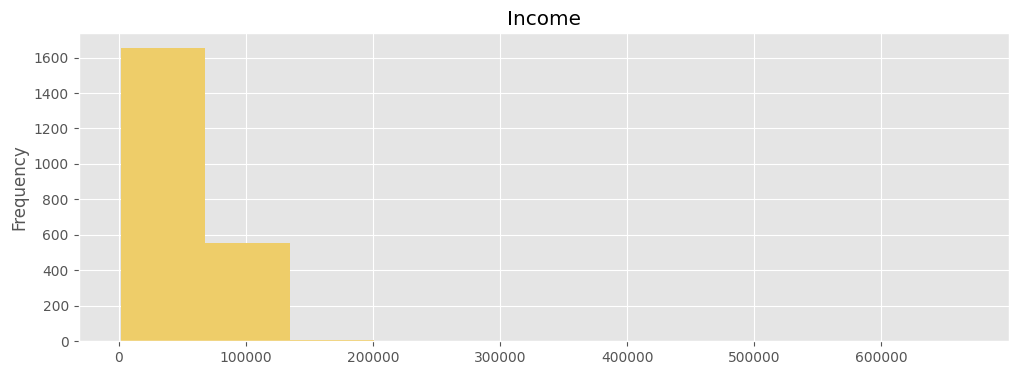

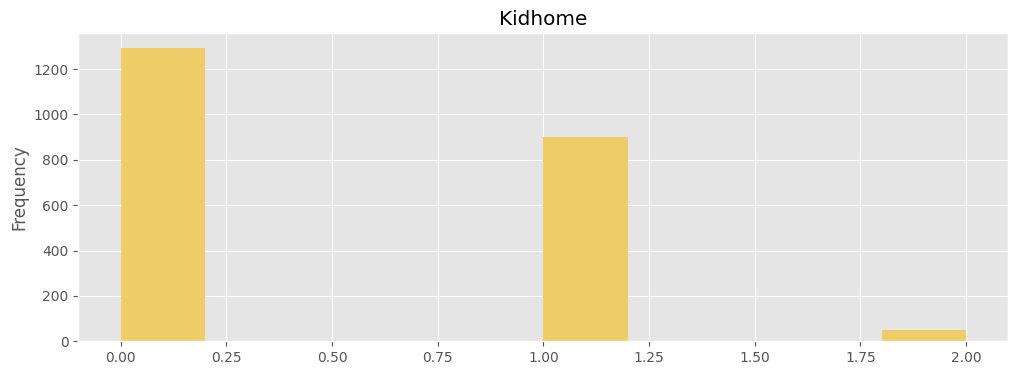

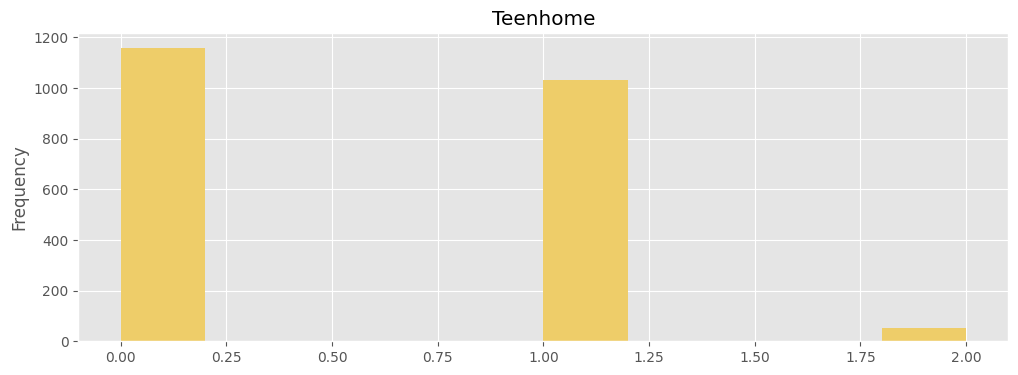

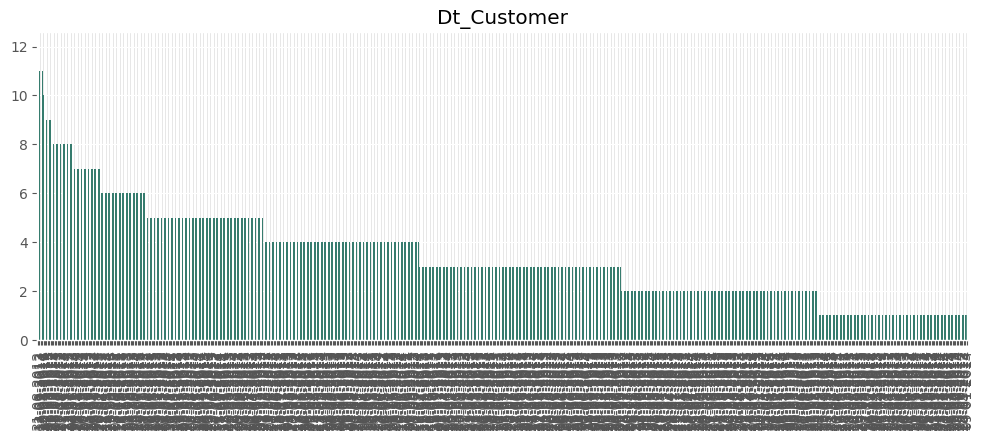

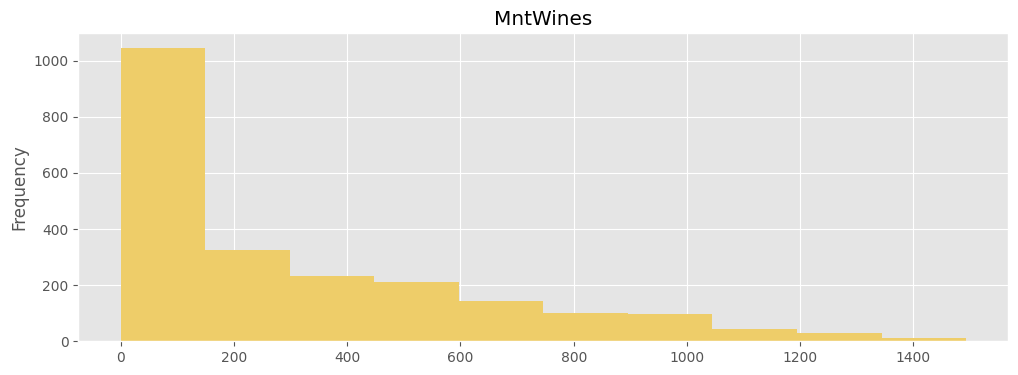

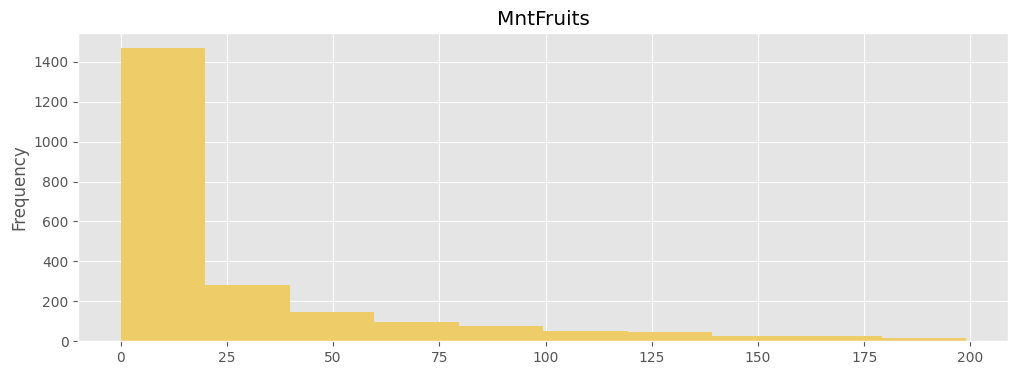

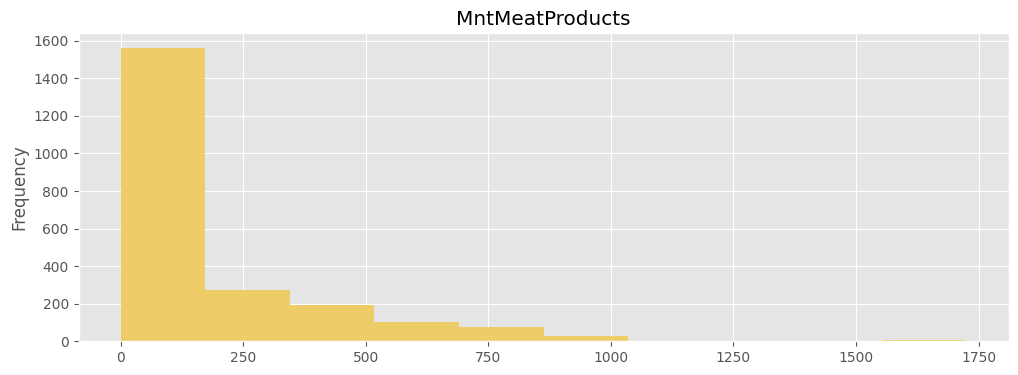

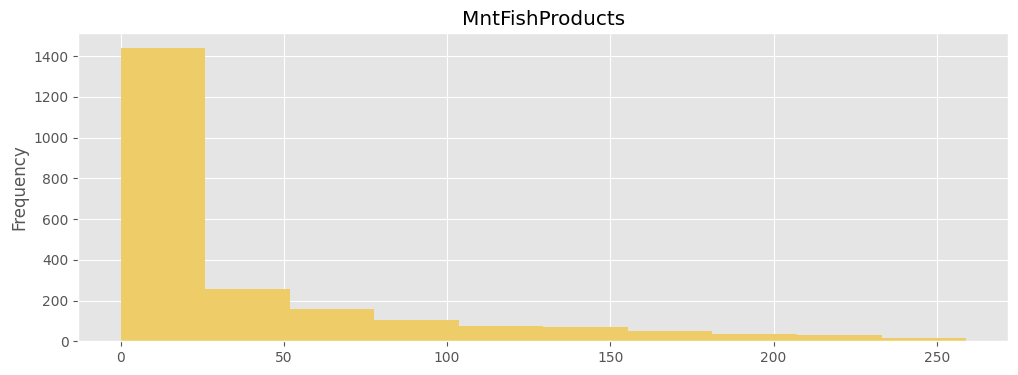

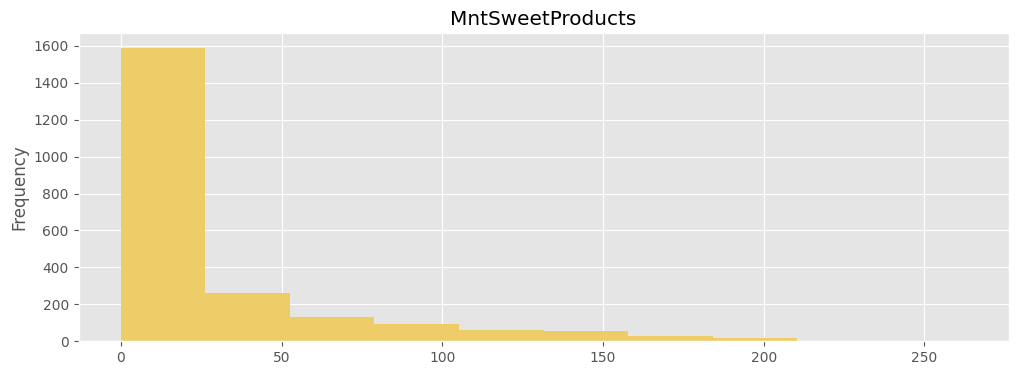

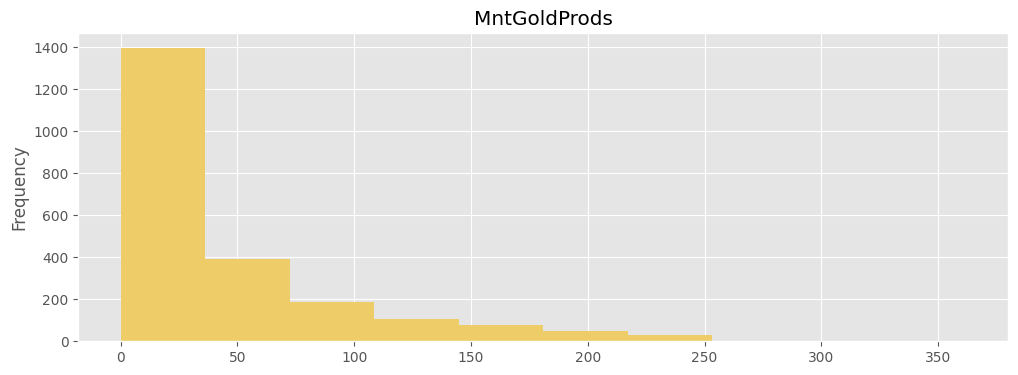

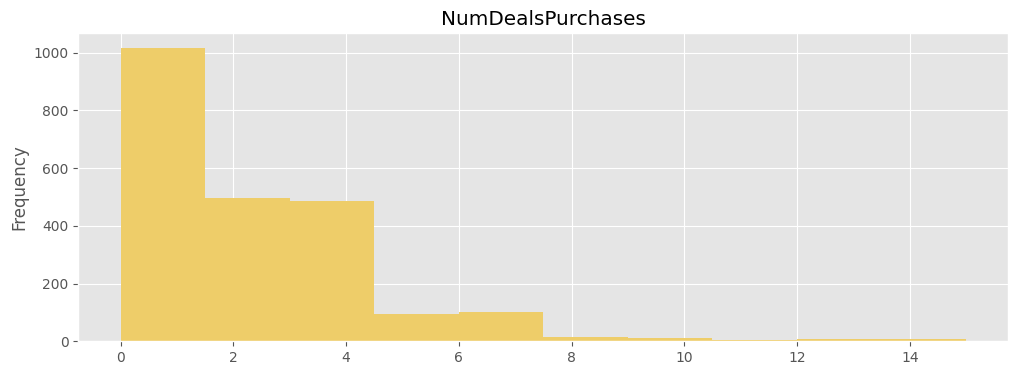

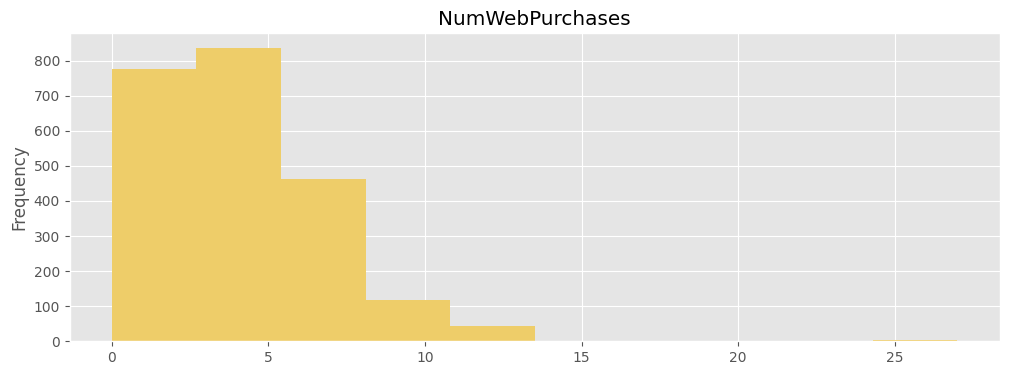

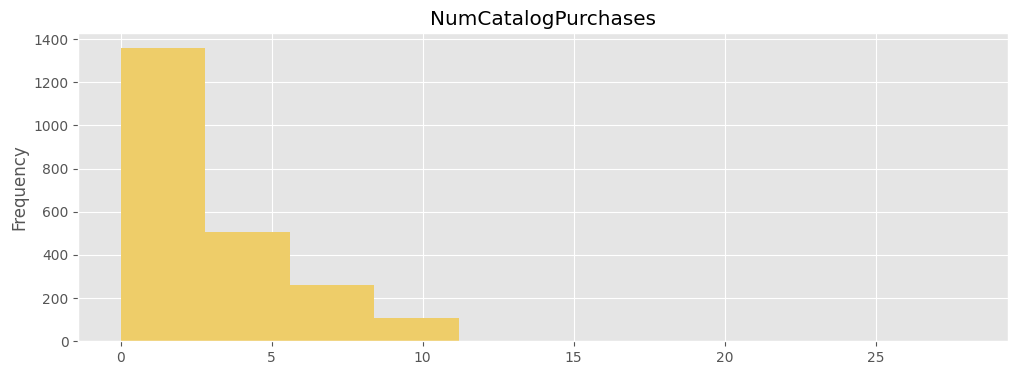

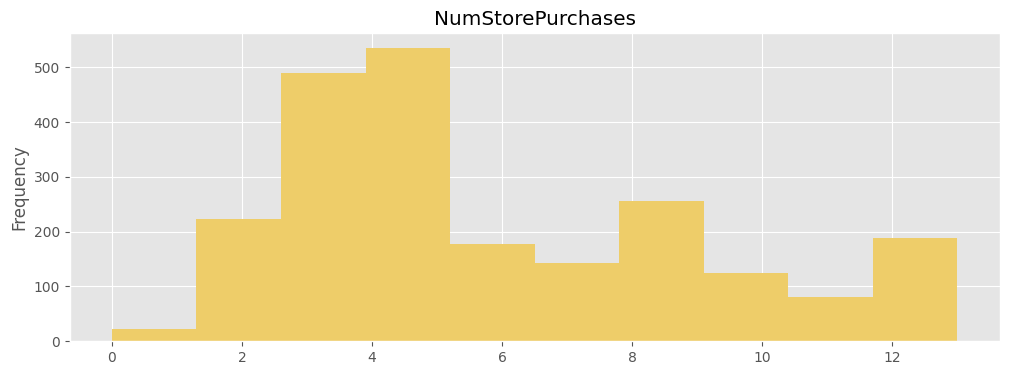

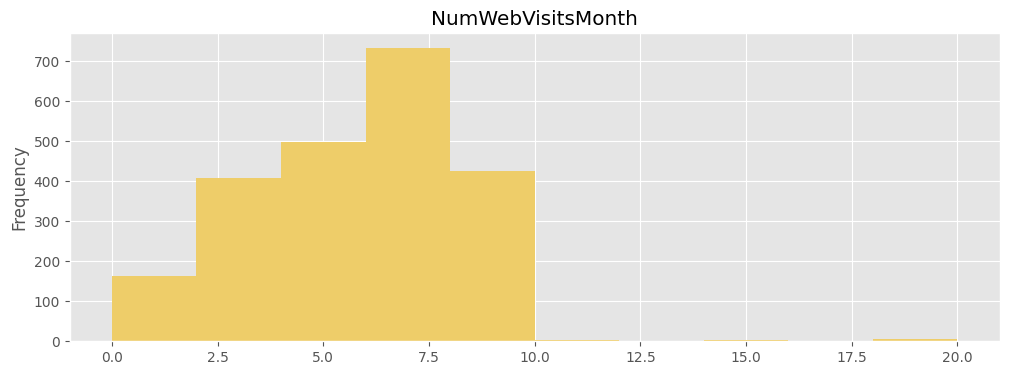

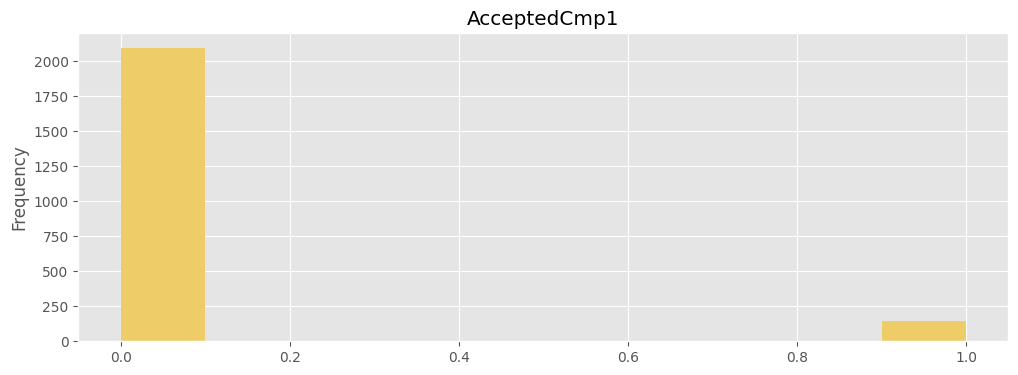

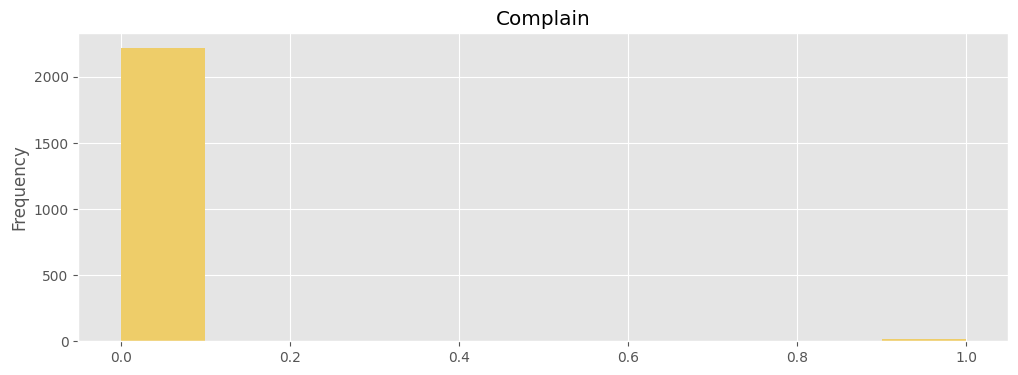

In [14]:
for feat in df.columns:
  if df[feat].dtype == 'object':
    df[feat].value_counts().plot(kind='bar', figsize=(12,4), title=feat, color=palette[0])
  else:
    df[feat].plot(kind='hist', figsize=(12,4), title=feat, color=palette[1])
  plt.show()

In [15]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

**Observations**

* YearBirth - outlier left side
* Education - 5 classed reduce dimenson
* Income - outliers right side
* Kidhome - 3 classes
* Teenhome - 3 classes
* DTcustomer - datetime need to correct
* MntWines - exponential distribution
* MntFruits - exponential distribution
* MntMeatProducts - exponential distribution
* MntFishProducts - exponential distribution
* MntSweetProducts - exponential distribution
* MntGoldProducts - exponential distribution
* NumDealsPurchases - exponential distribution
* NumWebPurchases - semi-exponential distribution
* NumCatalogPurchases - exponential distribution
* NumStorePurchases - abnorml uniform distribution
* NumWebVisitsMonth - outliers right side
* AcceptedCmp1 - 2 classes imbalanced in favor of class 0
* Complain - 2 classes imbalanced in favor of class 0

# Preprocessing

# engineer month feature

In [16]:
df['Month'] = pd.DatetimeIndex(df['Dt_Customer']).month

<ipython-input-16-d45b597c419e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Month'] = pd.DatetimeIndex(df['Dt_Customer']).month


In [17]:
df['Month'].value_counts()

8     211
10    209
3     202
12    202
5     192
1     191
2     187
11    185
4     184
6     170
9     166
7     141
Name: Month, dtype: int64